In [180]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns


In [181]:
df = pd.read_csv("/Users/ricardordoriguez/Desktop/Data Science Workspace/British_Airways_Job_sim/Task 2/customer_booking.csv", encoding='latin-1')

## Data Preprocessing

In [182]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [183]:
# check for null values
df.isnull().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [185]:
# unique values in sales_channel and trip_type
df['trip_type'].unique()

array(['RoundTrip', 'CircleTrip', 'OneWay'], dtype=object)

## EDA

In [186]:

# Filter to include only complete bookings
df_complete = df[df['booking_complete'] == 1]

# Aggregate the number of complete bookings by country
country_bookings = df_complete.groupby('booking_origin').size().reset_index(name='complete_bookings')

# Create the choropleth map
fig = px.choropleth(country_bookings, 
                    locations='booking_origin', 
                    locationmode='country names',
                    color='complete_bookings',
                    color_continuous_scale='Viridis',
                    title='Number of Complete Bookings by Country')

# Show the map
fig.show()


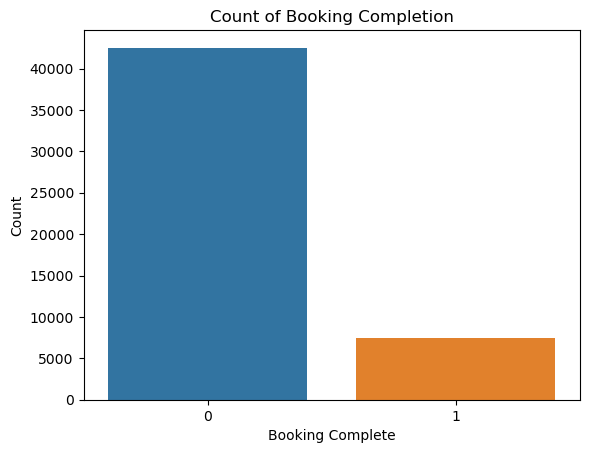

In [171]:
sns.countplot(data=df, x='booking_complete' )
plt.xlabel('Booking Complete')
plt.ylabel('Count')
plt.title('Count of Booking Completion')
plt.show()


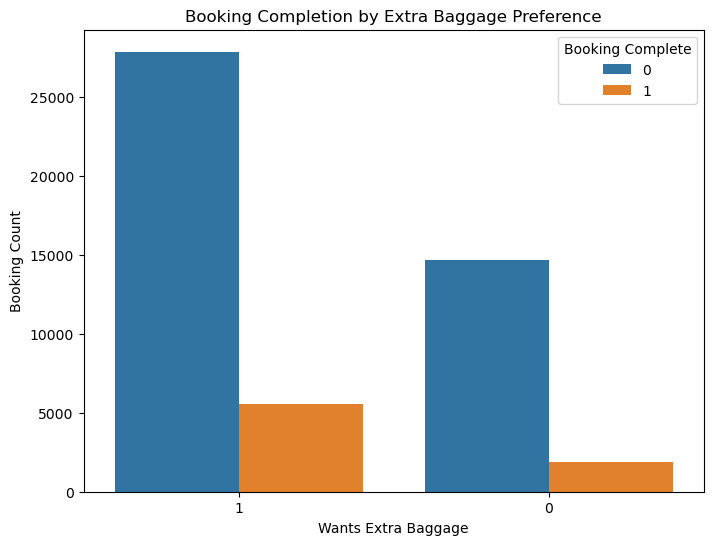

In [179]:
plt.figure(figsize=(8, 6))
X = df['wants_extra_baggage'].astype(str)
Y = df['booking_complete'].astype(str)
sns.countplot(data=df, x=X, hue=Y, dodge=True)
plt.xlabel('Wants Extra Baggage')
plt.ylabel('Booking Count')
plt.title('Booking Completion by Extra Baggage Preference')
plt.legend(title='Booking Complete')
plt.show()


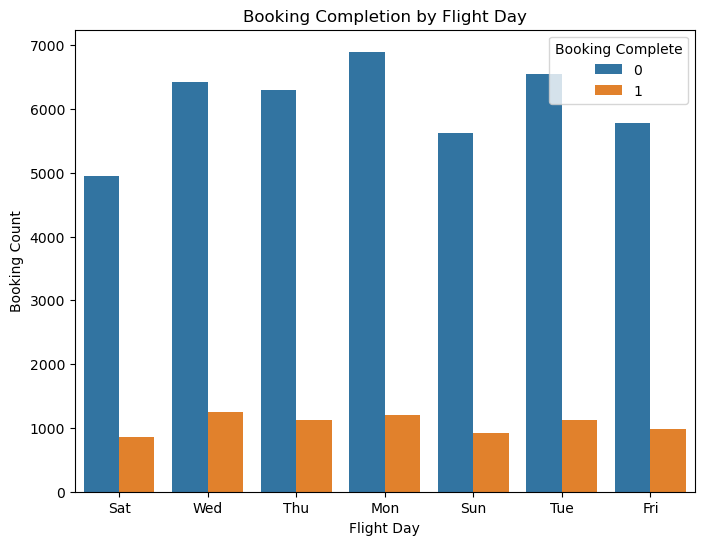

In [178]:
plt.figure(figsize=(8, 6))
X = df['flight_day'].astype(str)
Y = df['booking_complete'].astype(str)
sns.countplot(data=df, x=X, hue=Y, dodge=True)
plt.xlabel('Flight Day')
plt.ylabel('Booking Count')
plt.title('Booking Completion by Flight Day')
plt.legend(title='Booking Complete')
plt.show()

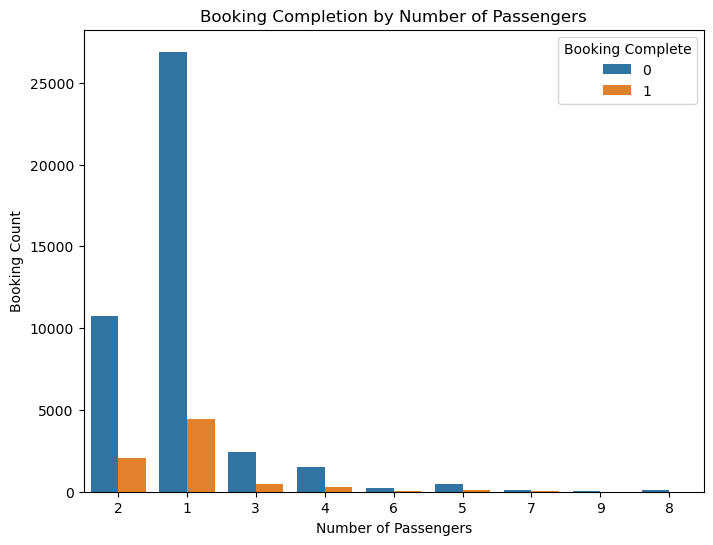

In [188]:
plt.figure(figsize=(8, 6))
X = df['num_passengers'].astype(str)
Y = df['booking_complete'].astype(str)
sns.countplot(data=df, x=X, hue=Y, dodge=True)
plt.xlabel('Number of Passengers')
plt.ylabel('Booking Count')
plt.title('Booking Completion by Number of Passengers')
plt.legend(title='Booking Complete')
plt.show()